In [216]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from itertools import accumulate

### Code given

In [217]:
def weighted_random(values, weights):
    total_weight = sum(weights)
    acum_weights = [w / total_weight for w in weights[:]]
    for i in range(len(weights)):
        acum_weights[i] += acum_weights[i]
        rand = random.random()
    for value, weight in zip(values, acum_weights):
        if weight > rand:
            return value

Function run_simulation is to test wether the code is retrieving expected results. If we run weighted_random function several times we should retrieved # values counts according to the "acum_weights" distribution

In [218]:
sim = []
def run_simulation(iters):
    for i in range(iters):
        vals = weighted_random([1,2,3] , [0.2 , 0.2, 0.6]) # proposed weights
        sim.append(vals)

In [219]:
run_simulation(100000)

(array([40219.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 59781.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

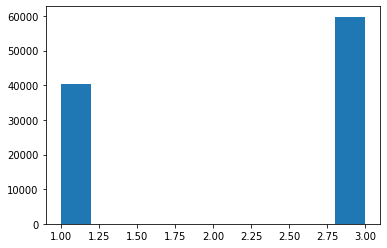

In [220]:
plt.hist(sim)

In this case we can easily see that the function given is not correct because is not generating the expected value for index 2, in this case we should se 20% of data in 1 , 20% of data in 2 and 60% of data in 3

### Fix code

In [210]:
def weighted_random(values, weights):
    
    total_weight = sum(weights)
    acum_weights = [w / total_weight for w in weights[:]]
    
    vals = 0
    tuds = []

    for i in acum_weights:
        vals = vals + i
        tuds.append(vals)

    rand = random.random()
        
    for value, weight in zip(values, tuds):
            if weight > rand:
                return value

In [211]:
weighted_random([1,2,3] , [0.2 , 0.2 , 0.6])

2

In [212]:
sim = []
def run_simulation(iters):
    for i in range(iters):
        vals = weighted_random([1,2,3] , [0.2 , 0.2, 0.6])
        sim.append(vals)

In [213]:
run_simulation(100000)

(array([19896.,     0.,     0.,     0.,     0., 19965.,     0.,     0.,
            0., 60139.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

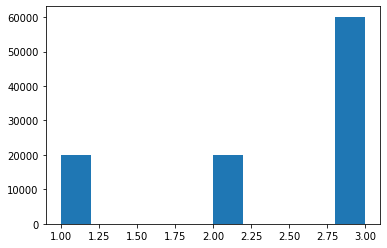

In [214]:
plt.hist(sim)